### 5 Crossfold Validation for 1-layer Model
##### 80:20 split for each crossfold validation step

In [2]:
import sys
sys.path.append('..')

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from core.getdata import *
from core.dataset import *
from core.network import *
from core.trainer import *
from core.visualization import *

from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [5]:
ligands = ["TNF", "R84", "PIC", "P3K", "FLA", "CpG", "FSL", "LPS", "UST"]
polarization = ["", "ib", "ig", "i0", "i3", "i4"]
replicas, size = 2, 1288

In [6]:
load_dir = '../models/cfv/'
save_dir = '../models/cfv/'
save_name = 'mmkfcv'

In [19]:
#model parameters
input_size = 1 
hidden_sizes = 98
output_size = 9
num_layers = 1

#training parameters
n_epochs = 75
batch_size = 65
learning_rate = 1e-3
k = 5

#device
torch.cuda.is_available()
device = torch.device("cuda:0")

### Empty Model for CV
* only need to execute this cell once

In [7]:
# net = LSTM(input_size, hidden_sizes, output_size, num_layers=num_layers, device=device)
# net.train()
# model = LSTMTrainer(model=net, device=device)

In [8]:
# model.save('../models/' + 'empty.pth')

### 5F-CV 

In [9]:
data1 = DatasetPolar(ligands, polarization, replicas, size)

In [10]:
net1 = LSTM(input_size, hidden_sizes, output_size, num_layers=num_layers, device=device)
net1.train()

LSTM(
  (lstm): LSTM(1, 98, batch_first=True)
  (fc1): Linear(in_features=98, out_features=9, bias=True)
)

In [11]:
model1 = LSTMTrainer(model=net1, device=device)

In [12]:
model1.kfcv(data1, k, save_name, batch_size=batch_size, n_epochs=n_epochs)

  1%|█                                                                                  | 1/75 [00:05<06:35,  5.34s/it]

Epoch 001: | Training Loss: 2.1692534178216882 | Validation Loss: 2.1504818045090293


  3%|██▏                                                                                | 2/75 [00:10<06:03,  4.98s/it]

Epoch 002: | Training Loss: 2.1617137278630354 | Validation Loss: 2.1131481327743176


  4%|███▎                                                                               | 3/75 [00:14<05:49,  4.86s/it]

Epoch 003: | Training Loss: 2.150891168791557 | Validation Loss: 2.1102247182453904


  5%|████▍                                                                              | 4/75 [00:19<05:40,  4.79s/it]

Epoch 004: | Training Loss: 2.1193979828157157 | Validation Loss: 2.110386236805782


  7%|█████▌                                                                             | 5/75 [00:24<05:37,  4.82s/it]

Epoch 005: | Training Loss: 2.127883819358371 | Validation Loss: 2.18685118728709


  8%|██████▋                                                                            | 6/75 [00:29<05:37,  4.90s/it]

Epoch 006: | Training Loss: 2.1634764523706704 | Validation Loss: 2.141010680488337


  9%|███████▋                                                                           | 7/75 [00:34<05:34,  4.91s/it]

Epoch 007: | Training Loss: 2.171862011200914 | Validation Loss: 2.1564813974861785


 11%|████████▊                                                                          | 8/75 [00:39<05:30,  4.93s/it]

Epoch 008: | Training Loss: 2.0816288176819544 | Validation Loss: 1.9322422118944542


 12%|█████████▉                                                                         | 9/75 [00:44<05:26,  4.94s/it]

Epoch 009: | Training Loss: 1.8459088640792347 | Validation Loss: 1.7480309872983772


 13%|██████████▉                                                                       | 10/75 [00:49<05:22,  4.96s/it]

Epoch 010: | Training Loss: 1.7169082083991756 | Validation Loss: 1.6623689899934786


 15%|████████████                                                                      | 11/75 [00:54<05:14,  4.92s/it]

Epoch 011: | Training Loss: 1.6657316588631301 | Validation Loss: 1.6202601484049146


 16%|█████████████                                                                     | 12/75 [00:58<05:08,  4.90s/it]

Epoch 012: | Training Loss: 1.6349301006749413 | Validation Loss: 1.613041005401968


 17%|██████████████▏                                                                   | 13/75 [01:03<05:04,  4.91s/it]

Epoch 013: | Training Loss: 1.6081473218781925 | Validation Loss: 1.583501960072562


 19%|███████████████▎                                                                  | 14/75 [01:09<05:05,  5.01s/it]

Epoch 014: | Training Loss: 1.5806310002770378 | Validation Loss: 1.5696010104963714


 20%|████████████████▍                                                                 | 15/75 [01:14<05:03,  5.05s/it]

Epoch 015: | Training Loss: 1.55567440571629 | Validation Loss: 1.5397732179855632


 21%|█████████████████▍                                                                | 16/75 [01:19<04:59,  5.08s/it]

Epoch 016: | Training Loss: 1.527951141941213 | Validation Loss: 1.5059041102355886


 23%|██████████████████▌                                                               | 17/75 [01:24<04:55,  5.10s/it]

Epoch 017: | Training Loss: 1.5098921329340087 | Validation Loss: 1.4904083720991546


 24%|███████████████████▋                                                              | 18/75 [01:29<04:51,  5.11s/it]

Epoch 018: | Training Loss: 1.4994454965970228 | Validation Loss: 1.4914965178364905


 25%|████████████████████▊                                                             | 19/75 [01:34<04:45,  5.10s/it]

Epoch 019: | Training Loss: 1.4727593152043976 | Validation Loss: 1.4619348622928157


 27%|█████████████████████▊                                                            | 20/75 [01:39<04:39,  5.09s/it]

Epoch 020: | Training Loss: 1.4481033987809564 | Validation Loss: 1.4484188066464718


 28%|██████████████████████▉                                                           | 21/75 [01:44<04:35,  5.10s/it]

Epoch 021: | Training Loss: 1.4261065363605445 | Validation Loss: 1.436084452076493


 29%|████████████████████████                                                          | 22/75 [01:50<04:30,  5.11s/it]

Epoch 022: | Training Loss: 1.4104431753403672 | Validation Loss: 1.3962624050746455


 31%|█████████████████████████▏                                                        | 23/75 [01:55<04:26,  5.13s/it]

Epoch 023: | Training Loss: 1.395857331908752 | Validation Loss: 1.3831944966984686


 32%|██████████████████████████▏                                                       | 24/75 [02:00<04:22,  5.16s/it]

Epoch 024: | Training Loss: 1.3797692504023837 | Validation Loss: 1.3747576191046527


 33%|███████████████████████████▎                                                      | 25/75 [02:05<04:18,  5.16s/it]

Epoch 025: | Training Loss: 1.3573897112613527 | Validation Loss: 1.35017214200207


 35%|████████████████████████████▍                                                     | 26/75 [02:10<04:10,  5.10s/it]

Epoch 026: | Training Loss: 1.3407618287846306 | Validation Loss: 1.3437062345932578


 36%|█████████████████████████████▌                                                    | 27/75 [02:15<04:01,  5.04s/it]

Epoch 027: | Training Loss: 1.323983266531864 | Validation Loss: 1.3260578357170676


 37%|██████████████████████████████▌                                                   | 28/75 [02:20<03:51,  4.93s/it]

Epoch 028: | Training Loss: 1.3173459193834633 | Validation Loss: 1.3353112314906075


 39%|███████████████████████████████▋                                                  | 29/75 [02:25<03:45,  4.90s/it]

Epoch 029: | Training Loss: 1.3095293613237755 | Validation Loss: 1.3036340363671846


 40%|████████████████████████████████▊                                                 | 30/75 [02:30<03:41,  4.92s/it]

Epoch 030: | Training Loss: 1.2889085384172814 | Validation Loss: 1.3027679769792289


 41%|█████████████████████████████████▉                                                | 31/75 [02:34<03:34,  4.87s/it]

Epoch 031: | Training Loss: 1.2762963041384643 | Validation Loss: 1.2891079750016472


 43%|██████████████████████████████████▉                                               | 32/75 [02:39<03:27,  4.84s/it]

Epoch 032: | Training Loss: 1.266779041805557 | Validation Loss: 1.3006632447799789


 44%|████████████████████████████████████                                              | 33/75 [02:44<03:20,  4.79s/it]

Epoch 033: | Training Loss: 1.2598636870350792 | Validation Loss: 1.2695935109508372


 45%|█████████████████████████████████████▏                                            | 34/75 [02:48<03:14,  4.74s/it]

Epoch 034: | Training Loss: 1.2512516510960097 | Validation Loss: 1.2739963013435078


 47%|██████████████████████████████████████▎                                           | 35/75 [02:53<03:07,  4.70s/it]

Epoch 035: | Training Loss: 1.2503478188659543 | Validation Loss: 1.2661574023349262


 48%|███████████████████████████████████████▎                                          | 36/75 [02:58<03:02,  4.68s/it]

Epoch 036: | Training Loss: 1.2460302933354244 | Validation Loss: 1.3553305435403484


 49%|████████████████████████████████████████▍                                         | 37/75 [03:02<02:56,  4.65s/it]

Epoch 037: | Training Loss: 1.3519076336627809 | Validation Loss: 1.3359551298841137


 51%|█████████████████████████████████████████▌                                        | 38/75 [03:07<02:51,  4.65s/it]

Epoch 038: | Training Loss: 1.278671383509569 | Validation Loss: 1.275955458110738


 52%|██████████████████████████████████████████▋                                       | 39/75 [03:11<02:47,  4.64s/it]

Epoch 039: | Training Loss: 1.229308766669759 | Validation Loss: 1.2777775289299331


 53%|███████████████████████████████████████████▋                                      | 40/75 [03:16<02:42,  4.64s/it]

Epoch 040: | Training Loss: 1.2149280090337602 | Validation Loss: 1.25388940945964


 55%|████████████████████████████████████████████▊                                     | 41/75 [03:21<02:37,  4.64s/it]

Epoch 041: | Training Loss: 1.3173583796091168 | Validation Loss: 1.6564704630976526


 56%|█████████████████████████████████████████████▉                                    | 42/75 [03:25<02:32,  4.63s/it]

Epoch 042: | Training Loss: 1.811643747943584 | Validation Loss: 1.8195887865307174


 57%|███████████████████████████████████████████████                                   | 43/75 [03:30<02:28,  4.63s/it]

Epoch 043: | Training Loss: 1.8905410376664633 | Validation Loss: 1.8283504927269767


 59%|████████████████████████████████████████████████                                  | 44/75 [03:35<02:23,  4.63s/it]

Epoch 044: | Training Loss: 1.617052555502018 | Validation Loss: 1.4332932451061


 60%|█████████████████████████████████████████████████▏                                | 45/75 [03:39<02:18,  4.62s/it]

Epoch 045: | Training Loss: 1.3351961371497574 | Validation Loss: 1.319693313580807


 61%|██████████████████████████████████████████████████▎                               | 46/75 [03:44<02:13,  4.62s/it]

Epoch 046: | Training Loss: 1.2511030025432044 | Validation Loss: 1.2594038298196881


 63%|███████████████████████████████████████████████████▍                              | 47/75 [03:48<02:09,  4.62s/it]

Epoch 047: | Training Loss: 1.2338267977688915 | Validation Loss: 1.242511774334952


 64%|████████████████████████████████████████████████████▍                             | 48/75 [03:53<02:04,  4.62s/it]

Epoch 048: | Training Loss: 1.2032511136799215 | Validation Loss: 1.2395277026100693


 65%|█████████████████████████████████████████████████████▌                            | 49/75 [03:58<02:00,  4.65s/it]

Epoch 049: | Training Loss: 1.1937987830872847 | Validation Loss: 1.3068396103716342


 67%|██████████████████████████████████████████████████████▋                           | 50/75 [04:02<01:56,  4.65s/it]

Epoch 050: | Training Loss: 1.2017842541648962 | Validation Loss: 1.3915986368589313


 68%|███████████████████████████████████████████████████████▊                          | 51/75 [04:07<01:51,  4.64s/it]

Epoch 051: | Training Loss: 1.1899762238576033 | Validation Loss: 1.2223969678455424


 69%|████████████████████████████████████████████████████████▊                         | 52/75 [04:12<01:46,  4.62s/it]

Epoch 052: | Training Loss: 1.168134274883805 | Validation Loss: 1.2885864207120699


 71%|█████████████████████████████████████████████████████████▉                        | 53/75 [04:16<01:41,  4.62s/it]

Epoch 053: | Training Loss: 1.1566896781186078 | Validation Loss: 1.2284206592033957


 72%|███████████████████████████████████████████████████████████                       | 54/75 [04:21<01:37,  4.62s/it]

Epoch 054: | Training Loss: 1.1540815729264902 | Validation Loss: 1.2149643393877512


 73%|████████████████████████████████████████████████████████████▏                     | 55/75 [04:25<01:32,  4.62s/it]

Epoch 055: | Training Loss: 1.1362769710265588 | Validation Loss: 1.2379176806066639


 75%|█████████████████████████████████████████████████████████████▏                    | 56/75 [04:30<01:27,  4.63s/it]

Epoch 056: | Training Loss: 1.1357299946596688 | Validation Loss: 1.1992501460503195


 76%|██████████████████████████████████████████████████████████████▎                   | 57/75 [04:35<01:23,  4.62s/it]

Epoch 057: | Training Loss: 1.1244440749287605 | Validation Loss: 1.2063337305438853


 77%|███████████████████████████████████████████████████████████████▍                  | 58/75 [04:39<01:18,  4.63s/it]

Epoch 058: | Training Loss: 1.145268348054351 | Validation Loss: 1.2014482723218258


 79%|████████████████████████████████████████████████████████████████▌                 | 59/75 [04:44<01:14,  4.63s/it]

Epoch 059: | Training Loss: 1.124776883938602 | Validation Loss: 1.2020910309853954


 80%|█████████████████████████████████████████████████████████████████▌                | 60/75 [04:49<01:09,  4.63s/it]

Epoch 060: | Training Loss: 1.1133711468254295 | Validation Loss: 1.2743327684491594


 81%|██████████████████████████████████████████████████████████████████▋               | 61/75 [04:53<01:04,  4.62s/it]

Epoch 061: | Training Loss: 1.1050924508371085 | Validation Loss: 1.1886928401817785


 83%|███████████████████████████████████████████████████████████████████▊              | 62/75 [04:58<01:00,  4.63s/it]

Epoch 062: | Training Loss: 1.1015844087455875 | Validation Loss: 1.3359350174943978


 84%|████████████████████████████████████████████████████████████████████▉             | 63/75 [05:02<00:55,  4.61s/it]

Epoch 063: | Training Loss: 1.1045045757265848 | Validation Loss: 1.1962397516330825


 85%|█████████████████████████████████████████████████████████████████████▉            | 64/75 [05:07<00:50,  4.61s/it]

Epoch 064: | Training Loss: 1.0868381884332015 | Validation Loss: 1.1818771022502508


 87%|███████████████████████████████████████████████████████████████████████           | 65/75 [05:12<00:46,  4.60s/it]

Epoch 065: | Training Loss: 1.0645209030709535 | Validation Loss: 1.169836764859262


 88%|████████████████████████████████████████████████████████████████████████▏         | 66/75 [05:16<00:41,  4.61s/it]

Epoch 066: | Training Loss: 1.0604445497009243 | Validation Loss: 1.1531161342825844


 89%|█████████████████████████████████████████████████████████████████████████▎        | 67/75 [05:21<00:36,  4.62s/it]

Epoch 067: | Training Loss: 1.05412864441348 | Validation Loss: 1.1542721070418849


 91%|██████████████████████████████████████████████████████████████████████████▎       | 68/75 [05:26<00:32,  4.62s/it]

Epoch 068: | Training Loss: 1.0442148066151922 | Validation Loss: 1.155351464436433


 92%|███████████████████████████████████████████████████████████████████████████▍      | 69/75 [05:30<00:27,  4.62s/it]

Epoch 069: | Training Loss: 1.0455856020344751 | Validation Loss: 1.1702801250965795


 93%|████████████████████████████████████████████████████████████████████████████▌     | 70/75 [05:35<00:23,  4.62s/it]

Epoch 070: | Training Loss: 1.0534497270377996 | Validation Loss: 1.1580383914096333


 95%|█████████████████████████████████████████████████████████████████████████████▋    | 71/75 [05:39<00:18,  4.62s/it]

Epoch 071: | Training Loss: 1.0777680082159622 | Validation Loss: 1.1472376119867664


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 72/75 [05:44<00:13,  4.62s/it]

Epoch 072: | Training Loss: 1.0442377395719011 | Validation Loss: 1.137560699309144


 97%|███████████████████████████████████████████████████████████████████████████████▊  | 73/75 [05:49<00:09,  4.62s/it]

Epoch 073: | Training Loss: 1.0153784177431435 | Validation Loss: 1.1882174067965179


 99%|████████████████████████████████████████████████████████████████████████████████▉ | 74/75 [05:53<00:04,  4.62s/it]

Epoch 074: | Training Loss: 1.0138351725083645 | Validation Loss: 1.1310514183802025


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [05:58<00:00,  4.78s/it]

Epoch 075: | Training Loss: 0.9973297798744986 | Validation Loss: 1.1293741264075876



  1%|█                                                                                  | 1/75 [00:04<05:39,  4.59s/it]

Epoch 001: | Training Loss: 2.1478285923182407 | Validation Loss: 2.187563242199265


  3%|██▏                                                                                | 2/75 [00:09<05:35,  4.60s/it]

Epoch 002: | Training Loss: 2.137560050342685 | Validation Loss: 2.0796525712325193


  4%|███▎                                                                               | 3/75 [00:13<05:31,  4.60s/it]

Epoch 003: | Training Loss: 2.16277769277586 | Validation Loss: 2.1251692214858866


  5%|████▍                                                                              | 4/75 [00:18<05:27,  4.61s/it]

Epoch 004: | Training Loss: 2.0950239190709925 | Validation Loss: 2.037803846541966


  7%|█████▌                                                                             | 5/75 [00:23<05:23,  4.62s/it]

Epoch 005: | Training Loss: 2.0196444290542157 | Validation Loss: 2.0034879368042278


  8%|██████▋                                                                            | 6/75 [00:27<05:19,  4.63s/it]

Epoch 006: | Training Loss: 1.9947715248459967 | Validation Loss: 1.990900825117236


  9%|███████▋                                                                           | 7/75 [00:32<05:14,  4.63s/it]

Epoch 007: | Training Loss: 1.9126356049118756 | Validation Loss: 1.8530294828325788


 11%|████████▊                                                                          | 8/75 [00:36<05:09,  4.62s/it]

Epoch 008: | Training Loss: 1.8048411359853833 | Validation Loss: 1.8553276775039245


 12%|█████████▉                                                                         | 9/75 [00:41<05:04,  4.62s/it]

Epoch 009: | Training Loss: 1.8307826865777792 | Validation Loss: 1.8292844785708133


 13%|██████████▉                                                                       | 10/75 [00:46<05:00,  4.62s/it]

Epoch 010: | Training Loss: 1.7688345975964983 | Validation Loss: 1.7435225259477847


 15%|████████████                                                                      | 11/75 [00:50<04:55,  4.62s/it]

Epoch 011: | Training Loss: 1.7580810871636756 | Validation Loss: 1.7251199606423067


 16%|█████████████                                                                     | 12/75 [00:55<04:50,  4.62s/it]

Epoch 012: | Training Loss: 1.7047923049915616 | Validation Loss: 1.787592221643323


 17%|██████████████▏                                                                   | 13/75 [01:00<04:46,  4.62s/it]

Epoch 013: | Training Loss: 1.7596900521594787 | Validation Loss: 1.7347968878033004


 19%|███████████████▎                                                                  | 14/75 [01:04<04:41,  4.61s/it]

Epoch 014: | Training Loss: 1.8639516189833667 | Validation Loss: 2.1540978523058314


 20%|████████████████▍                                                                 | 15/75 [01:09<04:37,  4.62s/it]

Epoch 015: | Training Loss: 2.1105032141242073 | Validation Loss: 2.177558424316834


 21%|█████████████████▍                                                                | 16/75 [01:13<04:32,  4.62s/it]

Epoch 016: | Training Loss: 2.1273456249281626 | Validation Loss: 2.067290554536837


 23%|██████████████████▌                                                               | 17/75 [01:18<04:28,  4.63s/it]

Epoch 017: | Training Loss: 2.053674085814262 | Validation Loss: 2.1542610654207035


 24%|███████████████████▋                                                              | 18/75 [01:23<04:23,  4.63s/it]

Epoch 018: | Training Loss: 1.9417666503202136 | Validation Loss: 1.7848473230254984


 25%|████████████████████▊                                                             | 19/75 [01:27<04:19,  4.63s/it]

Epoch 019: | Training Loss: 1.740802309501951 | Validation Loss: 1.703992195218523


 27%|█████████████████████▊                                                            | 20/75 [01:32<04:14,  4.63s/it]

Epoch 020: | Training Loss: 1.6761540161950566 | Validation Loss: 1.65828431376787


 28%|██████████████████████▉                                                           | 21/75 [01:37<04:09,  4.63s/it]

Epoch 021: | Training Loss: 1.6293348419332059 | Validation Loss: 1.6207896554581473


 29%|████████████████████████                                                          | 22/75 [01:41<04:05,  4.63s/it]

Epoch 022: | Training Loss: 1.5938467214876246 | Validation Loss: 1.5824989581776556


 31%|█████████████████████████▏                                                        | 23/75 [01:46<04:03,  4.68s/it]

Epoch 023: | Training Loss: 1.5684271112223651 | Validation Loss: 1.5592496467527943


 32%|██████████████████████████▏                                                       | 24/75 [01:51<04:08,  4.87s/it]

Epoch 024: | Training Loss: 1.5409349296416077 | Validation Loss: 1.537656945602916


 33%|███████████████████████████▎                                                      | 25/75 [01:57<04:10,  5.00s/it]

Epoch 025: | Training Loss: 1.5116834055597537 | Validation Loss: 1.5087988298630046


 35%|████████████████████████████▍                                                     | 26/75 [02:02<04:08,  5.08s/it]

Epoch 026: | Training Loss: 1.4843264504849354 | Validation Loss: 1.4855715777272376


 36%|█████████████████████████████▌                                                    | 27/75 [02:07<04:05,  5.11s/it]

Epoch 027: | Training Loss: 1.4546323270301953 | Validation Loss: 1.4563620168472005


 37%|██████████████████████████████▌                                                   | 28/75 [02:12<04:00,  5.11s/it]

Epoch 028: | Training Loss: 1.430369983348891 | Validation Loss: 1.456446813645764


 39%|███████████████████████████████▋                                                  | 29/75 [02:17<03:56,  5.13s/it]

Epoch 029: | Training Loss: 1.4047971998698243 | Validation Loss: 1.404884516078735


 40%|████████████████████████████████▊                                                 | 30/75 [02:23<03:51,  5.15s/it]

Epoch 030: | Training Loss: 1.3813251754112332 | Validation Loss: 1.4042971891777538


 41%|█████████████████████████████████▉                                                | 31/75 [02:28<03:51,  5.26s/it]

Epoch 031: | Training Loss: 1.3659011326103567 | Validation Loss: 1.3830656715642626


 43%|██████████████████████████████████▉                                               | 32/75 [02:33<03:45,  5.24s/it]

Epoch 032: | Training Loss: 1.345144986479639 | Validation Loss: 1.366101495016401


 44%|████████████████████████████████████                                              | 33/75 [02:38<03:38,  5.21s/it]

Epoch 033: | Training Loss: 1.3222473556889551 | Validation Loss: 1.367119653202663


 45%|█████████████████████████████████████▏                                            | 34/75 [02:44<03:33,  5.20s/it]

Epoch 034: | Training Loss: 1.3015357709933664 | Validation Loss: 1.329705770327666


 47%|██████████████████████████████████████▎                                           | 35/75 [02:48<03:23,  5.09s/it]

Epoch 035: | Training Loss: 1.280480932270255 | Validation Loss: 1.3276074528694153


 48%|███████████████████████████████████████▎                                          | 36/75 [02:53<03:16,  5.03s/it]

Epoch 036: | Training Loss: 1.2861022199286478 | Validation Loss: 1.3128923238994918


 49%|████████████████████████████████████████▍                                         | 37/75 [02:58<03:11,  5.04s/it]

Epoch 037: | Training Loss: 1.2609256509447766 | Validation Loss: 1.281348559900979


 51%|█████████████████████████████████████████▌                                        | 38/75 [03:03<03:06,  5.03s/it]

Epoch 038: | Training Loss: 1.241299210655912 | Validation Loss: 1.2709291936638198


 52%|██████████████████████████████████████████▋                                       | 39/75 [03:08<02:58,  4.96s/it]

Epoch 039: | Training Loss: 1.2338081518205526 | Validation Loss: 1.266141287634306


 53%|███████████████████████████████████████████▋                                      | 40/75 [03:13<02:51,  4.89s/it]

Epoch 040: | Training Loss: 1.2190344027965982 | Validation Loss: 1.3096438326011195


 55%|████████████████████████████████████████████▊                                     | 41/75 [03:18<02:44,  4.85s/it]

Epoch 041: | Training Loss: 1.2093044113472244 | Validation Loss: 1.3036521121720288


 56%|█████████████████████████████████████████████▉                                    | 42/75 [03:22<02:38,  4.79s/it]

Epoch 042: | Training Loss: 1.2079740745302672 | Validation Loss: 1.2486500653708092


 57%|███████████████████████████████████████████████                                   | 43/75 [03:27<02:32,  4.76s/it]

Epoch 043: | Training Loss: 1.1868982838693065 | Validation Loss: 1.267659131611619


 59%|████████████████████████████████████████████████                                  | 44/75 [03:32<02:26,  4.72s/it]

Epoch 044: | Training Loss: 1.1812354930650408 | Validation Loss: 1.2267148505861514


 60%|█████████████████████████████████████████████████▏                                | 45/75 [03:36<02:21,  4.71s/it]

Epoch 045: | Training Loss: 1.16800805055928 | Validation Loss: 1.2527439493999304


 61%|██████████████████████████████████████████████████▎                               | 46/75 [03:41<02:17,  4.72s/it]

Epoch 046: | Training Loss: 1.1590131631242895 | Validation Loss: 1.2369435897497374


 63%|███████████████████████████████████████████████████▍                              | 47/75 [03:46<02:12,  4.72s/it]

Epoch 047: | Training Loss: 1.1554152267140763 | Validation Loss: 1.2084187870827792


 64%|████████████████████████████████████████████████████▍                             | 48/75 [03:51<02:07,  4.73s/it]

Epoch 048: | Training Loss: 1.1393620380174334 | Validation Loss: 1.2322278543610439


 65%|█████████████████████████████████████████████████████▌                            | 49/75 [03:55<02:03,  4.74s/it]

Epoch 049: | Training Loss: 1.1406085269751949 | Validation Loss: 1.2094910208866976


 67%|██████████████████████████████████████████████████████▋                           | 50/75 [04:00<01:59,  4.79s/it]

Epoch 050: | Training Loss: 1.124493373610149 | Validation Loss: 1.2286017537117004


 68%|███████████████████████████████████████████████████████▊                          | 51/75 [04:05<01:54,  4.77s/it]

Epoch 051: | Training Loss: 1.1761781778708797 | Validation Loss: 1.1917566406392606


 69%|████████████████████████████████████████████████████████▊                         | 52/75 [04:10<01:49,  4.74s/it]

Epoch 052: | Training Loss: 1.1367749792532387 | Validation Loss: 1.1930465077128365


 71%|█████████████████████████████████████████████████████████▉                        | 53/75 [04:14<01:44,  4.73s/it]

Epoch 053: | Training Loss: 1.103394330244198 | Validation Loss: 1.2279318236859045


 72%|███████████████████████████████████████████████████████████                       | 54/75 [04:19<01:39,  4.75s/it]

Epoch 054: | Training Loss: 1.0965975435955502 | Validation Loss: 1.1812709745402648


 73%|████████████████████████████████████████████████████████████▏                     | 55/75 [04:24<01:35,  4.78s/it]

Epoch 055: | Training Loss: 1.0871189998410573 | Validation Loss: 1.194253895605836


 75%|█████████████████████████████████████████████████████████████▏                    | 56/75 [04:29<01:31,  4.79s/it]

Epoch 056: | Training Loss: 1.112334252378651 | Validation Loss: 1.215142376233484


 76%|██████████████████████████████████████████████████████████████▎                   | 57/75 [04:34<01:31,  5.07s/it]

Epoch 057: | Training Loss: 1.0737644209761485 | Validation Loss: 1.2258939567570375


 77%|███████████████████████████████████████████████████████████████▍                  | 58/75 [04:42<01:39,  5.85s/it]

Epoch 058: | Training Loss: 1.0760229813439823 | Validation Loss: 1.1803966287140535


 79%|████████████████████████████████████████████████████████████████▌                 | 59/75 [04:50<01:43,  6.46s/it]

Epoch 059: | Training Loss: 1.06492892826829 | Validation Loss: 1.1892342280561679


 80%|█████████████████████████████████████████████████████████████████▌                | 60/75 [04:58<01:42,  6.86s/it]

Epoch 060: | Training Loss: 1.050192291421868 | Validation Loss: 1.152068114726343


 81%|██████████████████████████████████████████████████████████████████▋               | 61/75 [05:06<01:41,  7.26s/it]

Epoch 061: | Training Loss: 1.0439991831222428 | Validation Loss: 1.1598929729417107


 83%|███████████████████████████████████████████████████████████████████▊              | 62/75 [05:15<01:39,  7.66s/it]

Epoch 062: | Training Loss: 1.0352404702489622 | Validation Loss: 1.1563002723399725


 84%|████████████████████████████████████████████████████████████████████▉             | 63/75 [05:23<01:35,  7.95s/it]

Epoch 063: | Training Loss: 1.0314383466388577 | Validation Loss: 1.1690657244664486


 85%|█████████████████████████████████████████████████████████████████████▉            | 64/75 [05:32<01:29,  8.12s/it]

Epoch 064: | Training Loss: 1.0238760388760924 | Validation Loss: 1.1383957166538061


 87%|███████████████████████████████████████████████████████████████████████           | 65/75 [05:40<01:22,  8.22s/it]

Epoch 065: | Training Loss: 1.0118452623904308 | Validation Loss: 1.1872374337410259


 88%|████████████████████████████████████████████████████████████████████████▏         | 66/75 [05:49<01:14,  8.29s/it]

Epoch 066: | Training Loss: 1.006719839071559 | Validation Loss: 1.147313607908855


 89%|█████████████████████████████████████████████████████████████████████████▎        | 67/75 [05:57<01:05,  8.19s/it]

Epoch 067: | Training Loss: 0.9934407054820907 | Validation Loss: 1.1889480536229142


 91%|██████████████████████████████████████████████████████████████████████████▎       | 68/75 [06:04<00:56,  8.09s/it]

Epoch 068: | Training Loss: 0.9968582047758815 | Validation Loss: 1.1302924133906855


 92%|███████████████████████████████████████████████████████████████████████████▍      | 69/75 [06:12<00:48,  8.06s/it]

Epoch 069: | Training Loss: 0.989401740309234 | Validation Loss: 1.1269181975137408


 93%|████████████████████████████████████████████████████████████████████████████▌     | 70/75 [06:20<00:39,  7.99s/it]

Epoch 070: | Training Loss: 0.974178568155409 | Validation Loss: 1.1182831495164711


 95%|█████████████████████████████████████████████████████████████████████████████▋    | 71/75 [06:28<00:31,  7.94s/it]

Epoch 071: | Training Loss: 0.9756128324944282 | Validation Loss: 1.1125172702508552


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 72/75 [06:36<00:23,  7.88s/it]

Epoch 072: | Training Loss: 1.0316522720261154 | Validation Loss: 1.1798015885821014


 97%|███████████████████████████████████████████████████████████████████████████████▊  | 73/75 [06:44<00:15,  7.84s/it]

Epoch 073: | Training Loss: 0.993297662203 | Validation Loss: 1.1234124102325083


 99%|████████████████████████████████████████████████████████████████████████████████▉ | 74/75 [06:51<00:07,  7.78s/it]

Epoch 074: | Training Loss: 0.9582522886100217 | Validation Loss: 1.1349451346932171


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [06:59<00:00,  5.59s/it]

Epoch 075: | Training Loss: 0.9467967647676155 | Validation Loss: 1.095663905979317



  1%|█                                                                                  | 1/75 [00:07<09:23,  7.62s/it]

Epoch 001: | Training Loss: 2.1649528282268027 | Validation Loss: 2.218695238371876


  3%|██▏                                                                                | 2/75 [00:15<09:22,  7.70s/it]

Epoch 002: | Training Loss: 2.136080636042301 | Validation Loss: 2.1914851999728477


  4%|███▎                                                                               | 3/75 [00:23<09:13,  7.69s/it]

Epoch 003: | Training Loss: 2.111488377518743 | Validation Loss: 2.163010756546092


  5%|████▍                                                                              | 4/75 [00:30<09:04,  7.67s/it]

Epoch 004: | Training Loss: 2.1255088920626686 | Validation Loss: 2.0571904967878467


  7%|█████▌                                                                             | 5/75 [00:38<08:57,  7.67s/it]

Epoch 005: | Training Loss: 2.0912719981692662 | Validation Loss: 2.1947583639733144


  8%|██████▋                                                                            | 6/75 [00:46<08:49,  7.67s/it]

Epoch 006: | Training Loss: 2.1386059245495037 | Validation Loss: 2.1004352937234896


  9%|███████▋                                                                           | 7/75 [00:53<08:38,  7.63s/it]

Epoch 007: | Training Loss: 2.1193835530604157 | Validation Loss: 2.1535590853646536


 11%|████████▊                                                                          | 8/75 [01:01<08:32,  7.65s/it]

Epoch 008: | Training Loss: 2.1337943116081095 | Validation Loss: 2.31003066535308


 12%|█████████▉                                                                         | 9/75 [01:08<08:26,  7.67s/it]

Epoch 009: | Training Loss: 2.181081104222859 | Validation Loss: 2.1828202855921237


 13%|██████████▉                                                                       | 10/75 [01:16<08:18,  7.66s/it]

Epoch 010: | Training Loss: 2.1657865491704404 | Validation Loss: 2.1247335460698493


 15%|████████████                                                                      | 11/75 [01:24<08:10,  7.66s/it]

Epoch 011: | Training Loss: 2.050764631027373 | Validation Loss: 1.9939784039960844


 16%|█████████████                                                                     | 12/75 [01:31<08:02,  7.65s/it]

Epoch 012: | Training Loss: 1.937270210168072 | Validation Loss: 1.8922767115530568


 17%|██████████████▏                                                                   | 13/75 [01:39<07:53,  7.64s/it]

Epoch 013: | Training Loss: 1.9267761244952122 | Validation Loss: 1.8750089401396635


 19%|███████████████▎                                                                  | 14/75 [01:47<07:46,  7.64s/it]

Epoch 014: | Training Loss: 1.82963467076003 | Validation Loss: 1.779543942937227


 20%|████████████████▍                                                                 | 15/75 [01:54<07:39,  7.65s/it]

Epoch 015: | Training Loss: 1.7521802004531166 | Validation Loss: 1.727262838421581


 21%|█████████████████▍                                                                | 16/75 [02:02<07:31,  7.65s/it]

Epoch 016: | Training Loss: 1.7015571787814114 | Validation Loss: 1.6863946257350602


 23%|██████████████████▌                                                               | 17/75 [02:10<07:24,  7.66s/it]

Epoch 017: | Training Loss: 1.6605886308667817 | Validation Loss: 1.6357755510606498


 24%|███████████████████▋                                                              | 18/75 [02:17<07:18,  7.69s/it]

Epoch 018: | Training Loss: 1.6174742121284253 | Validation Loss: 1.5875846615461546


 25%|████████████████████▊                                                             | 19/75 [02:26<07:16,  7.80s/it]

Epoch 019: | Training Loss: 1.570898702072206 | Validation Loss: 1.5621960636611296


 27%|█████████████████████▊                                                            | 20/75 [02:34<07:20,  8.01s/it]

Epoch 020: | Training Loss: 1.5321904603287437 | Validation Loss: 1.5276578347259593


 28%|██████████████████████▉                                                           | 21/75 [02:42<07:16,  8.08s/it]

Epoch 021: | Training Loss: 1.5016916922041188 | Validation Loss: 1.5153373106617793


 29%|████████████████████████                                                          | 22/75 [02:50<07:01,  7.95s/it]

Epoch 022: | Training Loss: 1.4775081644548433 | Validation Loss: 1.4698253073424936


 31%|█████████████████████████▏                                                        | 23/75 [02:58<06:49,  7.88s/it]

Epoch 023: | Training Loss: 1.4490568694945807 | Validation Loss: 1.4478800374770833


 32%|██████████████████████████▏                                                       | 24/75 [03:05<06:39,  7.83s/it]

Epoch 024: | Training Loss: 1.4343382234328261 | Validation Loss: 1.4345949565138771


 33%|███████████████████████████▎                                                      | 25/75 [03:13<06:35,  7.91s/it]

Epoch 025: | Training Loss: 1.4163075372158924 | Validation Loss: 1.4095683365224678


 35%|████████████████████████████▍                                                     | 26/75 [03:22<06:31,  8.00s/it]

Epoch 026: | Training Loss: 1.389951987662048 | Validation Loss: 1.4211630180617358


 36%|█████████████████████████████▌                                                    | 27/75 [03:30<06:28,  8.10s/it]

Epoch 027: | Training Loss: 1.3709097948865356 | Validation Loss: 1.4066954851150513


 37%|██████████████████████████████▌                                                   | 28/75 [03:38<06:16,  8.01s/it]

Epoch 028: | Training Loss: 1.3553211177899458 | Validation Loss: 1.3669156359734935


 39%|███████████████████████████████▋                                                  | 29/75 [03:46<06:04,  7.93s/it]

Epoch 029: | Training Loss: 1.341948765808734 | Validation Loss: 1.362267903635435


 40%|████████████████████████████████▊                                                 | 30/75 [03:54<05:59,  7.98s/it]

Epoch 030: | Training Loss: 1.3194347606780372 | Validation Loss: 1.3608395774787831


 41%|█████████████████████████████████▉                                                | 31/75 [04:02<05:53,  8.03s/it]

Epoch 031: | Training Loss: 1.3095797234885047 | Validation Loss: 1.3164195387719948


 43%|██████████████████████████████████▉                                               | 32/75 [04:09<05:39,  7.90s/it]

Epoch 032: | Training Loss: 1.2977348915605902 | Validation Loss: 1.3064476435429582


 44%|████████████████████████████████████                                              | 33/75 [04:17<05:33,  7.95s/it]

Epoch 033: | Training Loss: 1.285217331530892 | Validation Loss: 1.301563811079364


 45%|█████████████████████████████████████▏                                            | 34/75 [04:25<05:24,  7.91s/it]

Epoch 034: | Training Loss: 1.281262910533174 | Validation Loss: 1.3078315363866146


 47%|██████████████████████████████████████▎                                           | 35/75 [04:30<04:41,  7.05s/it]

Epoch 035: | Training Loss: 1.264904964610795 | Validation Loss: 1.3067770583607325


 48%|███████████████████████████████████████▎                                          | 36/75 [04:35<04:08,  6.37s/it]

Epoch 036: | Training Loss: 1.255128478335443 | Validation Loss: 1.2808953172692628


 49%|████████████████████████████████████████▍                                         | 37/75 [04:40<03:43,  5.89s/it]

Epoch 037: | Training Loss: 1.2415680172287415 | Validation Loss: 1.3135103338232665


 51%|█████████████████████████████████████████▌                                        | 38/75 [04:45<03:25,  5.55s/it]

Epoch 038: | Training Loss: 1.2314453697371706 | Validation Loss: 1.26759679545866


 52%|██████████████████████████████████████████▋                                       | 39/75 [04:49<03:11,  5.31s/it]

Epoch 039: | Training Loss: 1.2297250784446145 | Validation Loss: 1.2627835521631152


 53%|███████████████████████████████████████████▋                                      | 40/75 [04:54<03:00,  5.15s/it]

Epoch 040: | Training Loss: 1.211022670232804 | Validation Loss: 1.2552125685125868


 55%|████████████████████████████████████████████▊                                     | 41/75 [04:59<02:50,  5.03s/it]

Epoch 041: | Training Loss: 1.2043183626972627 | Validation Loss: 1.2690876513441032


 56%|█████████████████████████████████████████████▉                                    | 42/75 [05:03<02:42,  4.91s/it]

Epoch 042: | Training Loss: 1.1977574566257334 | Validation Loss: 1.2524721630822833


 57%|███████████████████████████████████████████████                                   | 43/75 [05:08<02:35,  4.86s/it]

Epoch 043: | Training Loss: 1.1927924085164738 | Validation Loss: 1.2837466962426622


 59%|████████████████████████████████████████████████                                  | 44/75 [05:13<02:30,  4.86s/it]

Epoch 044: | Training Loss: 1.1864835993151799 | Validation Loss: 1.2393086622251528


 60%|█████████████████████████████████████████████████▏                                | 45/75 [05:18<02:24,  4.80s/it]

Epoch 045: | Training Loss: 1.1647171677551538 | Validation Loss: 1.2420712723353198


 61%|██████████████████████████████████████████████████▎                               | 46/75 [05:23<02:18,  4.79s/it]

Epoch 046: | Training Loss: 1.1704934595204959 | Validation Loss: 1.228406269416631


 63%|███████████████████████████████████████████████████▍                              | 47/75 [05:27<02:13,  4.76s/it]

Epoch 047: | Training Loss: 1.1511247730422243 | Validation Loss: 1.2491982815978684


 64%|████████████████████████████████████████████████████▍                             | 48/75 [05:32<02:08,  4.76s/it]

Epoch 048: | Training Loss: 1.1565161253386569 | Validation Loss: 1.2095680699170193


 65%|█████████████████████████████████████████████████████▌                            | 49/75 [05:37<02:04,  4.77s/it]

Epoch 049: | Training Loss: 1.1352147853402335 | Validation Loss: 1.2278693385213335


 67%|██████████████████████████████████████████████████████▋                           | 50/75 [05:41<01:58,  4.75s/it]

Epoch 050: | Training Loss: 1.1326236395496074 | Validation Loss: 1.1941609014974577


 68%|███████████████████████████████████████████████████████▊                          | 51/75 [05:46<01:53,  4.74s/it]

Epoch 051: | Training Loss: 1.1232664469525078 | Validation Loss: 1.20067331167025


 69%|████████████████████████████████████████████████████████▊                         | 52/75 [05:51<01:48,  4.72s/it]

Epoch 052: | Training Loss: 1.1276567845701058 | Validation Loss: 1.2031575820156346


 71%|█████████████████████████████████████████████████████████▉                        | 53/75 [05:56<01:43,  4.72s/it]

Epoch 053: | Training Loss: 1.116886956460565 | Validation Loss: 1.2551849398100487


 72%|███████████████████████████████████████████████████████████                       | 54/75 [06:00<01:38,  4.71s/it]

Epoch 054: | Training Loss: 1.1041101360014667 | Validation Loss: 1.2325923882912253


 73%|████████████████████████████████████████████████████████████▏                     | 55/75 [06:05<01:34,  4.72s/it]

Epoch 055: | Training Loss: 1.0969499413655184 | Validation Loss: 1.1985444067237534


 75%|█████████████████████████████████████████████████████████████▏                    | 56/75 [06:10<01:29,  4.72s/it]

Epoch 056: | Training Loss: 1.1172357123588847 | Validation Loss: 1.2374602444818086


 76%|██████████████████████████████████████████████████████████████▎                   | 57/75 [06:14<01:25,  4.72s/it]

Epoch 057: | Training Loss: 1.0843551541878798 | Validation Loss: 1.1704403465596316


 77%|███████████████████████████████████████████████████████████████▍                  | 58/75 [06:19<01:20,  4.73s/it]

Epoch 058: | Training Loss: 1.0704970919640264 | Validation Loss: 1.2487823567657828


 79%|████████████████████████████████████████████████████████████████▌                 | 59/75 [06:24<01:15,  4.72s/it]

Epoch 059: | Training Loss: 1.0747416064003918 | Validation Loss: 1.1876991895314688


 80%|█████████████████████████████████████████████████████████████████▌                | 60/75 [06:29<01:10,  4.71s/it]

Epoch 060: | Training Loss: 1.070071258556063 | Validation Loss: 1.1774924188573783


 81%|██████████████████████████████████████████████████████████████████▋               | 61/75 [06:33<01:05,  4.71s/it]

Epoch 061: | Training Loss: 1.0661893317075533 | Validation Loss: 1.1787473350484794


 83%|███████████████████████████████████████████████████████████████████▊              | 62/75 [06:38<01:01,  4.71s/it]

Epoch 062: | Training Loss: 1.053103809532161 | Validation Loss: 1.157984043671706


 84%|████████████████████████████████████████████████████████████████████▉             | 63/75 [06:43<00:56,  4.71s/it]

Epoch 063: | Training Loss: 1.0410705357093677 | Validation Loss: 1.2156509355963947


 85%|█████████████████████████████████████████████████████████████████████▉            | 64/75 [06:47<00:51,  4.69s/it]

Epoch 064: | Training Loss: 1.060627557894337 | Validation Loss: 1.1745165355294664


 87%|███████████████████████████████████████████████████████████████████████           | 65/75 [06:52<00:46,  4.69s/it]

Epoch 065: | Training Loss: 1.0306338809221705 | Validation Loss: 1.1404450204327843


 88%|████████████████████████████████████████████████████████████████████████▏         | 66/75 [06:57<00:42,  4.71s/it]

Epoch 066: | Training Loss: 1.023732301857427 | Validation Loss: 1.1570802732048748


 89%|█████████████████████████████████████████████████████████████████████████▎        | 67/75 [07:02<00:38,  4.75s/it]

Epoch 067: | Training Loss: 1.0209528033699944 | Validation Loss: 1.163606849786277


 91%|██████████████████████████████████████████████████████████████████████████▎       | 68/75 [07:06<00:33,  4.74s/it]

Epoch 068: | Training Loss: 1.0289065628965324 | Validation Loss: 1.1718819612097517


 92%|███████████████████████████████████████████████████████████████████████████▍      | 69/75 [07:11<00:28,  4.74s/it]

Epoch 069: | Training Loss: 1.0046710892815456 | Validation Loss: 1.149753223234248


 93%|████████████████████████████████████████████████████████████████████████████▌     | 70/75 [07:16<00:23,  4.72s/it]

Epoch 070: | Training Loss: 1.0086099878649846 | Validation Loss: 1.1518299432001382


 95%|█████████████████████████████████████████████████████████████████████████████▋    | 71/75 [07:20<00:18,  4.72s/it]

Epoch 071: | Training Loss: 1.0045511077776133 | Validation Loss: 1.1289327712816613


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 72/75 [07:25<00:14,  4.73s/it]

Epoch 072: | Training Loss: 0.9963658642128249 | Validation Loss: 1.1297170923692044


 97%|███████████████████████████████████████████████████████████████████████████████▊  | 73/75 [07:30<00:09,  4.73s/it]

Epoch 073: | Training Loss: 0.9895549268226758 | Validation Loss: 1.1275529109428977


 99%|████████████████████████████████████████████████████████████████████████████████▉ | 74/75 [07:35<00:04,  4.72s/it]

Epoch 074: | Training Loss: 0.9945310304794356 | Validation Loss: 1.1737264734562312


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [07:39<00:00,  6.13s/it]

Epoch 075: | Training Loss: 1.0047319880991339 | Validation Loss: 1.137506193925287



  1%|█                                                                                  | 1/75 [00:04<05:47,  4.69s/it]

Epoch 001: | Training Loss: 2.1387082093229917 | Validation Loss: 2.202953197131647


  3%|██▏                                                                                | 2/75 [00:09<05:44,  4.72s/it]

Epoch 002: | Training Loss: 2.1998935837611975 | Validation Loss: 2.2006350287767216


  4%|███▎                                                                               | 3/75 [00:14<05:42,  4.76s/it]

Epoch 003: | Training Loss: 2.1936203305409334 | Validation Loss: 2.1633624607157484


  5%|████▍                                                                              | 4/75 [00:19<05:38,  4.77s/it]

Epoch 004: | Training Loss: 2.1939099344694726 | Validation Loss: 2.1850837324267234


  7%|█████▌                                                                             | 5/75 [00:23<05:32,  4.75s/it]

Epoch 005: | Training Loss: 2.1903419177108834 | Validation Loss: 2.1936348387014086


  8%|██████▋                                                                            | 6/75 [00:28<05:27,  4.74s/it]

Epoch 006: | Training Loss: 2.1668820010724468 | Validation Loss: 2.1171562103467565


  9%|███████▋                                                                           | 7/75 [00:33<05:21,  4.73s/it]

Epoch 007: | Training Loss: 2.123064049772013 | Validation Loss: 2.0703741841227097


 11%|████████▊                                                                          | 8/75 [00:37<05:15,  4.72s/it]

Epoch 008: | Training Loss: 2.0298502939605267 | Validation Loss: 2.0333282279076976


 12%|█████████▉                                                                         | 9/75 [00:42<05:10,  4.71s/it]

Epoch 009: | Training Loss: 1.8911644225922701 | Validation Loss: 1.77556793934831


 13%|██████████▉                                                                       | 10/75 [00:47<05:05,  4.70s/it]

Epoch 010: | Training Loss: 1.7769188677596155 | Validation Loss: 1.7136006828780486


 15%|████████████                                                                      | 11/75 [00:51<05:02,  4.72s/it]

Epoch 011: | Training Loss: 1.7074634328345273 | Validation Loss: 1.680107136753118


 16%|█████████████                                                                     | 12/75 [00:56<04:57,  4.73s/it]

Epoch 012: | Training Loss: 1.6750401552313956 | Validation Loss: 1.6753720033948667


 17%|██████████████▏                                                                   | 13/75 [01:01<04:52,  4.72s/it]

Epoch 013: | Training Loss: 1.6473542766593328 | Validation Loss: 1.6312457835562875


 19%|███████████████▎                                                                  | 14/75 [01:06<04:48,  4.73s/it]

Epoch 014: | Training Loss: 1.6199827302839154 | Validation Loss: 1.6177164739537462


 20%|████████████████▍                                                                 | 15/75 [01:10<04:42,  4.72s/it]

Epoch 015: | Training Loss: 1.5887343915544938 | Validation Loss: 1.5579189953402939


 21%|█████████████████▍                                                                | 16/75 [01:15<04:39,  4.73s/it]

Epoch 016: | Training Loss: 1.5565683681552656 | Validation Loss: 1.5199338593215586


 23%|██████████████████▌                                                               | 17/75 [01:20<04:34,  4.74s/it]

Epoch 017: | Training Loss: 1.5255021186911057 | Validation Loss: 1.515565185346336


 24%|███████████████████▋                                                              | 18/75 [01:25<04:30,  4.75s/it]

Epoch 018: | Training Loss: 1.5003548481754054 | Validation Loss: 1.5037356581643364


 25%|████████████████████▊                                                             | 19/75 [01:29<04:24,  4.73s/it]

Epoch 019: | Training Loss: 1.4746727008964413 | Validation Loss: 1.4741772909030737


 27%|█████████████████████▊                                                            | 20/75 [01:34<04:19,  4.73s/it]

Epoch 020: | Training Loss: 1.4511936681571407 | Validation Loss: 1.4366196845179406


 28%|██████████████████████▉                                                           | 21/75 [01:39<04:15,  4.72s/it]

Epoch 021: | Training Loss: 1.4380751934564002 | Validation Loss: 1.4514678894916428


 29%|████████████████████████                                                          | 22/75 [01:44<04:12,  4.77s/it]

Epoch 022: | Training Loss: 1.4173177236987051 | Validation Loss: 1.4211795575150818


 31%|█████████████████████████▏                                                        | 23/75 [01:49<04:13,  4.88s/it]

Epoch 023: | Training Loss: 1.3903012707411686 | Validation Loss: 1.4013428827312504


 32%|██████████████████████████▏                                                       | 24/75 [01:54<04:14,  5.00s/it]

Epoch 024: | Training Loss: 1.3760377855919232 | Validation Loss: 1.381012042549169


 33%|███████████████████████████▎                                                      | 25/75 [01:59<04:07,  4.96s/it]

Epoch 025: | Training Loss: 1.3582598409641569 | Validation Loss: 1.3743218634730188


 35%|████████████████████████████▍                                                     | 26/75 [02:04<03:59,  4.89s/it]

Epoch 026: | Training Loss: 1.345163530069534 | Validation Loss: 1.367711419257048


 36%|█████████████████████████████▌                                                    | 27/75 [02:08<03:51,  4.83s/it]

Epoch 027: | Training Loss: 1.3366182465280327 | Validation Loss: 1.362023733486639


 37%|██████████████████████████████▌                                                   | 28/75 [02:13<03:45,  4.80s/it]

Epoch 028: | Training Loss: 1.3132971711108619 | Validation Loss: 1.3447747887852035


 39%|███████████████████████████████▋                                                  | 29/75 [02:18<03:40,  4.80s/it]

Epoch 029: | Training Loss: 1.3013239386622037 | Validation Loss: 1.324492032839873


 40%|████████████████████████████████▊                                                 | 30/75 [02:23<03:34,  4.76s/it]

Epoch 030: | Training Loss: 1.289972357939337 | Validation Loss: 1.3428703309776626


 41%|█████████████████████████████████▉                                                | 31/75 [02:27<03:28,  4.73s/it]

Epoch 031: | Training Loss: 1.274169636594358 | Validation Loss: 1.29217985467376


 43%|██████████████████████████████████▉                                               | 32/75 [02:32<03:22,  4.71s/it]

Epoch 032: | Training Loss: 1.2730873777905358 | Validation Loss: 1.2920565315496142


 44%|████████████████████████████████████                                              | 33/75 [02:37<03:17,  4.70s/it]

Epoch 033: | Training Loss: 1.251151585342171 | Validation Loss: 1.2847989917358504


 45%|█████████████████████████████████████▏                                            | 34/75 [02:41<03:13,  4.72s/it]

Epoch 034: | Training Loss: 1.253091208567129 | Validation Loss: 1.3204212049457515


 47%|██████████████████████████████████████▎                                           | 35/75 [02:46<03:09,  4.75s/it]

Epoch 035: | Training Loss: 1.2415376545112824 | Validation Loss: 1.2971190400769776


 48%|███████████████████████████████████████▎                                          | 36/75 [02:51<03:05,  4.74s/it]

Epoch 036: | Training Loss: 1.225171828381369 | Validation Loss: 1.2543412820201054


 49%|████████████████████████████████████████▍                                         | 37/75 [02:56<03:00,  4.76s/it]

Epoch 037: | Training Loss: 1.234598435809679 | Validation Loss: 1.3029552639644837


 51%|█████████████████████████████████████████▌                                        | 38/75 [03:00<02:55,  4.76s/it]

Epoch 038: | Training Loss: 1.421466598931317 | Validation Loss: 1.4101762002873643


 52%|██████████████████████████████████████████▋                                       | 39/75 [03:05<02:51,  4.75s/it]

Epoch 039: | Training Loss: 1.3379128276605472 | Validation Loss: 1.3283053079498148


 53%|███████████████████████████████████████████▋                                      | 40/75 [03:10<02:46,  4.75s/it]

Epoch 040: | Training Loss: 1.3141761613644172 | Validation Loss: 1.339054702598358


 55%|████████████████████████████████████████████▊                                     | 41/75 [03:15<02:41,  4.74s/it]

Epoch 041: | Training Loss: 1.2698861150958827 | Validation Loss: 1.3191361697477715


 56%|█████████████████████████████████████████████▉                                    | 42/75 [03:19<02:36,  4.74s/it]

Epoch 042: | Training Loss: 1.247850767641424 | Validation Loss: 1.2842031862134131


 57%|███████████████████████████████████████████████                                   | 43/75 [03:24<02:32,  4.77s/it]

Epoch 043: | Training Loss: 1.2320622195289515 | Validation Loss: 1.27261631984577


 59%|████████████████████████████████████████████████                                  | 44/75 [03:29<02:27,  4.77s/it]

Epoch 044: | Training Loss: 1.2214858643362456 | Validation Loss: 1.2519327137514809


 60%|█████████████████████████████████████████████████▏                                | 45/75 [03:34<02:24,  4.82s/it]

Epoch 045: | Training Loss: 1.2132265021171524 | Validation Loss: 1.2450859958880416


 61%|██████████████████████████████████████████████████▎                               | 46/75 [03:39<02:21,  4.89s/it]

Epoch 046: | Training Loss: 1.1998752881990415 | Validation Loss: 1.2391143179385462


 63%|███████████████████████████████████████████████████▍                              | 47/75 [03:44<02:18,  4.95s/it]

Epoch 047: | Training Loss: 1.188032382629185 | Validation Loss: 1.236181652155992


 64%|████████████████████████████████████████████████████▍                             | 48/75 [03:49<02:12,  4.90s/it]

Epoch 048: | Training Loss: 1.3329090447487117 | Validation Loss: 1.2630751625956775


 65%|█████████████████████████████████████████████████████▌                            | 49/75 [03:54<02:06,  4.85s/it]

Epoch 049: | Training Loss: 1.1956366392496591 | Validation Loss: 1.2323844689075079


 67%|██████████████████████████████████████████████████████▋                           | 50/75 [03:58<01:59,  4.80s/it]

Epoch 050: | Training Loss: 1.1741117202093667 | Validation Loss: 1.2254234126238066


 68%|███████████████████████████████████████████████████████▊                          | 51/75 [04:03<01:54,  4.77s/it]

Epoch 051: | Training Loss: 1.166404804406322 | Validation Loss: 1.2066520831295262


 69%|████████████████████████████████████████████████████████▊                         | 52/75 [04:08<01:49,  4.75s/it]

Epoch 052: | Training Loss: 1.153271322216943 | Validation Loss: 1.2216661458260545


 71%|█████████████████████████████████████████████████████████▉                        | 53/75 [04:12<01:43,  4.72s/it]

Epoch 053: | Training Loss: 1.1409310701990796 | Validation Loss: 1.2185044266353144


 72%|███████████████████████████████████████████████████████████                       | 54/75 [04:17<01:38,  4.71s/it]

Epoch 054: | Training Loss: 1.1395732678960417 | Validation Loss: 1.200337705489631


 73%|████████████████████████████████████████████████████████████▏                     | 55/75 [04:22<01:33,  4.69s/it]

Epoch 055: | Training Loss: 1.1313102469544545 | Validation Loss: 1.207573561467857


 75%|█████████████████████████████████████████████████████████████▏                    | 56/75 [04:26<01:28,  4.68s/it]

Epoch 056: | Training Loss: 1.125845349211002 | Validation Loss: 1.1917407802332227


 76%|██████████████████████████████████████████████████████████████▎                   | 57/75 [04:31<01:24,  4.67s/it]

Epoch 057: | Training Loss: 1.1100912838477954 | Validation Loss: 1.1862582076932782


 77%|███████████████████████████████████████████████████████████████▍                  | 58/75 [04:36<01:19,  4.69s/it]

Epoch 058: | Training Loss: 1.0981348729300722 | Validation Loss: 1.1733386636337386


 79%|████████████████████████████████████████████████████████████████▌                 | 59/75 [04:40<01:14,  4.69s/it]

Epoch 059: | Training Loss: 1.086596103193604 | Validation Loss: 1.2020057144566116


 80%|█████████████████████████████████████████████████████████████████▌                | 60/75 [04:45<01:10,  4.68s/it]

Epoch 060: | Training Loss: 1.0797859653134212 | Validation Loss: 1.162773933923133


 81%|██████████████████████████████████████████████████████████████████▋               | 61/75 [04:50<01:05,  4.66s/it]

Epoch 061: | Training Loss: 1.0714738712968113 | Validation Loss: 1.1751075267234696


 83%|███████████████████████████████████████████████████████████████████▊              | 62/75 [04:54<01:00,  4.66s/it]

Epoch 062: | Training Loss: 1.061374996588609 | Validation Loss: 1.1699534924787895


 84%|████████████████████████████████████████████████████████████████████▉             | 63/75 [04:59<00:56,  4.67s/it]

Epoch 063: | Training Loss: 1.0578972848358554 | Validation Loss: 1.1768501465008638


 85%|█████████████████████████████████████████████████████████████████████▉            | 64/75 [05:04<00:51,  4.66s/it]

Epoch 064: | Training Loss: 1.0501631070102486 | Validation Loss: 1.1674610660454938


 87%|███████████████████████████████████████████████████████████████████████           | 65/75 [05:08<00:46,  4.67s/it]

Epoch 065: | Training Loss: 1.0314470085306702 | Validation Loss: 1.1392254230575027


 88%|████████████████████████████████████████████████████████████████████████▏         | 66/75 [05:13<00:41,  4.66s/it]

Epoch 066: | Training Loss: 1.0408638318147614 | Validation Loss: 1.1414067734067685


 89%|█████████████████████████████████████████████████████████████████████████▎        | 67/75 [05:18<00:37,  4.66s/it]

Epoch 067: | Training Loss: 1.0170225372242037 | Validation Loss: 1.129838146338953


 91%|██████████████████████████████████████████████████████████████████████████▎       | 68/75 [05:22<00:32,  4.66s/it]

Epoch 068: | Training Loss: 1.0258162827970825 | Validation Loss: 1.1832177424542258


 92%|███████████████████████████████████████████████████████████████████████████▍      | 69/75 [05:27<00:27,  4.67s/it]

Epoch 069: | Training Loss: 1.0220727323789462 | Validation Loss: 1.1200692077106404


 93%|████████████████████████████████████████████████████████████████████████████▌     | 70/75 [05:32<00:23,  4.67s/it]

Epoch 070: | Training Loss: 0.9976766206254469 | Validation Loss: 1.118942836734736


 95%|█████████████████████████████████████████████████████████████████████████████▋    | 71/75 [05:36<00:18,  4.66s/it]

Epoch 071: | Training Loss: 1.000541588274118 | Validation Loss: 1.1138120836743683


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 72/75 [05:41<00:14,  4.67s/it]

Epoch 072: | Training Loss: 0.9870116766368118 | Validation Loss: 1.1193381840380552


 97%|███████████████████████████████████████████████████████████████████████████████▊  | 73/75 [05:46<00:09,  4.65s/it]

Epoch 073: | Training Loss: 0.9793328992395758 | Validation Loss: 1.126742619498868


 99%|████████████████████████████████████████████████████████████████████████████████▉ | 74/75 [05:50<00:04,  4.66s/it]

Epoch 074: | Training Loss: 0.9810387549974094 | Validation Loss: 1.1130043376829022


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [05:55<00:00,  4.74s/it]

Epoch 075: | Training Loss: 0.9571031592438154 | Validation Loss: 1.1015257320114384



  1%|█                                                                                  | 1/75 [00:04<05:46,  4.68s/it]

Epoch 001: | Training Loss: 2.1686178189571774 | Validation Loss: 2.117973127097727


  3%|██▏                                                                                | 2/75 [00:09<05:42,  4.69s/it]

Epoch 002: | Training Loss: 2.124247237900707 | Validation Loss: 2.1113400180763175


  4%|███▎                                                                               | 3/75 [00:14<05:37,  4.68s/it]

Epoch 003: | Training Loss: 2.1005665786633982 | Validation Loss: 2.075958308215453


  5%|████▍                                                                              | 4/75 [00:18<05:32,  4.68s/it]

Epoch 004: | Training Loss: 2.097090265879007 | Validation Loss: 2.036413909675919


  7%|█████▌                                                                             | 5/75 [00:23<05:26,  4.67s/it]

Epoch 005: | Training Loss: 2.1351842664391083 | Validation Loss: 2.1041220688374245


  8%|██████▋                                                                            | 6/75 [00:28<05:22,  4.67s/it]

Epoch 006: | Training Loss: 2.117866720551642 | Validation Loss: 2.152961492538452


  9%|███████▋                                                                           | 7/75 [00:32<05:18,  4.68s/it]

Epoch 007: | Training Loss: 2.1040119197324056 | Validation Loss: 2.035912782789391


 11%|████████▊                                                                          | 8/75 [00:37<05:13,  4.68s/it]

Epoch 008: | Training Loss: 1.9867278308233367 | Validation Loss: 1.929065138380104


 12%|█████████▉                                                                         | 9/75 [00:42<05:08,  4.68s/it]

Epoch 009: | Training Loss: 1.860567285635761 | Validation Loss: 1.8847769794063034


 13%|██████████▉                                                                       | 10/75 [00:46<05:03,  4.67s/it]

Epoch 010: | Training Loss: 1.7927508734375517 | Validation Loss: 1.7513275603267635


 15%|████████████                                                                      | 11/75 [00:51<04:57,  4.65s/it]

Epoch 011: | Training Loss: 1.6995129887467233 | Validation Loss: 1.6875717188710364


 16%|█████████████                                                                     | 12/75 [00:56<04:53,  4.66s/it]

Epoch 012: | Training Loss: 1.6339639121683958 | Validation Loss: 1.6349636878922722


 17%|██████████████▏                                                                   | 13/75 [01:00<04:49,  4.66s/it]

Epoch 013: | Training Loss: 1.5931279212236404 | Validation Loss: 1.5809442829862934


 19%|███████████████▎                                                                  | 14/75 [01:05<04:44,  4.66s/it]

Epoch 014: | Training Loss: 1.554714075594305 | Validation Loss: 1.5589443868565782


 20%|████████████████▍                                                                 | 15/75 [01:10<04:40,  4.67s/it]

Epoch 015: | Training Loss: 1.529207318324909 | Validation Loss: 1.532166591314512


 21%|█████████████████▍                                                                | 16/75 [01:14<04:35,  4.67s/it]

Epoch 016: | Training Loss: 1.49782726015443 | Validation Loss: 1.5015684995695808


 23%|██████████████████▌                                                               | 17/75 [01:19<04:30,  4.67s/it]

Epoch 017: | Training Loss: 1.4727753191907829 | Validation Loss: 1.4828380697241454


 24%|███████████████████▋                                                              | 18/75 [01:24<04:25,  4.66s/it]

Epoch 018: | Training Loss: 1.4558596133350212 | Validation Loss: 1.4725919165343881


 25%|████████████████████▊                                                             | 19/75 [01:28<04:21,  4.67s/it]

Epoch 019: | Training Loss: 1.4293181230531675 | Validation Loss: 1.4456076872683017


 27%|█████████████████████▊                                                            | 20/75 [01:33<04:17,  4.69s/it]

Epoch 020: | Training Loss: 1.4092374129969383 | Validation Loss: 1.4080761693348394


 28%|██████████████████████▉                                                           | 21/75 [01:38<04:12,  4.68s/it]

Epoch 021: | Training Loss: 1.3844743275614542 | Validation Loss: 1.4084081833607682


 29%|████████████████████████                                                          | 22/75 [01:42<04:07,  4.67s/it]

Epoch 022: | Training Loss: 1.3750688466374006 | Validation Loss: 1.3782350777465606


 31%|█████████████████████████▏                                                        | 23/75 [01:47<04:02,  4.66s/it]

Epoch 023: | Training Loss: 1.3651188017330438 | Validation Loss: 1.3690636099498963


 32%|██████████████████████████▏                                                       | 24/75 [01:52<03:57,  4.66s/it]

Epoch 024: | Training Loss: 1.347152630720183 | Validation Loss: 1.3768626072696437


 33%|███████████████████████████▎                                                      | 25/75 [01:56<03:55,  4.70s/it]

Epoch 025: | Training Loss: 1.3352601073473414 | Validation Loss: 1.3712965049476267


 35%|████████████████████████████▍                                                     | 26/75 [02:02<03:58,  4.87s/it]

Epoch 026: | Training Loss: 1.322917831069398 | Validation Loss: 1.3907788462727984


 36%|█████████████████████████████▌                                                    | 27/75 [02:07<04:00,  5.01s/it]

Epoch 027: | Training Loss: 1.3109339500002772 | Validation Loss: 1.336777350055837


 37%|██████████████████████████████▌                                                   | 28/75 [02:12<04:00,  5.13s/it]

Epoch 028: | Training Loss: 1.3341190507896592 | Validation Loss: 1.3476518827064015


 39%|███████████████████████████████▋                                                  | 29/75 [02:18<03:59,  5.20s/it]

Epoch 029: | Training Loss: 1.2973932797942207 | Validation Loss: 1.32746936896137


 40%|████████████████████████████████▊                                                 | 30/75 [02:23<03:51,  5.14s/it]

Epoch 030: | Training Loss: 1.2772112397529254 | Validation Loss: 1.3238344498883898


 41%|█████████████████████████████████▉                                                | 31/75 [02:28<03:42,  5.06s/it]

Epoch 031: | Training Loss: 1.2792523974013106 | Validation Loss: 1.3421446274374134


 43%|██████████████████████████████████▉                                               | 32/75 [02:32<03:34,  4.98s/it]

Epoch 032: | Training Loss: 1.268219709257099 | Validation Loss: 1.3028748561845762


 44%|████████████████████████████████████                                              | 33/75 [02:37<03:25,  4.90s/it]

Epoch 033: | Training Loss: 1.2909732080090826 | Validation Loss: 1.3075024524581766


 45%|█████████████████████████████████████▏                                            | 34/75 [02:42<03:18,  4.84s/it]

Epoch 034: | Training Loss: 1.2442819882776135 | Validation Loss: 1.2806189834514512


 47%|██████████████████████████████████████▎                                           | 35/75 [02:46<03:11,  4.79s/it]

Epoch 035: | Training Loss: 1.230649300964079 | Validation Loss: 1.2854490645020922


 48%|███████████████████████████████████████▎                                          | 36/75 [02:51<03:05,  4.75s/it]

Epoch 036: | Training Loss: 1.2554166692300377 | Validation Loss: 1.2732978315553933


 49%|████████████████████████████████████████▍                                         | 37/75 [02:56<02:59,  4.73s/it]

Epoch 037: | Training Loss: 1.2116859567778133 | Validation Loss: 1.2804858985348282


 51%|█████████████████████████████████████████▌                                        | 38/75 [03:01<02:55,  4.73s/it]

Epoch 038: | Training Loss: 1.2106619342883056 | Validation Loss: 1.2594767794987867


 52%|██████████████████████████████████████████▋                                       | 39/75 [03:05<02:49,  4.72s/it]

Epoch 039: | Training Loss: 1.2017368079624444 | Validation Loss: 1.3014246974593011


 53%|███████████████████████████████████████████▋                                      | 40/75 [03:10<02:44,  4.71s/it]

Epoch 040: | Training Loss: 1.1982616780795783 | Validation Loss: 1.2390814952761213


 55%|████████████████████████████████████████████▊                                     | 41/75 [03:15<02:39,  4.70s/it]

Epoch 041: | Training Loss: 1.18307424824093 | Validation Loss: 1.3173051785642855


 56%|█████████████████████████████████████████████▉                                    | 42/75 [03:19<02:35,  4.70s/it]

Epoch 042: | Training Loss: 1.1859512605538993 | Validation Loss: 1.2565299718179435


 57%|███████████████████████████████████████████████                                   | 43/75 [03:24<02:30,  4.70s/it]

Epoch 043: | Training Loss: 1.172895106339009 | Validation Loss: 1.2562092381103016


 59%|████████████████████████████████████████████████                                  | 44/75 [03:29<02:25,  4.70s/it]

Epoch 044: | Training Loss: 1.1604184780583204 | Validation Loss: 1.2218448834441533


 60%|█████████████████████████████████████████████████▏                                | 45/75 [03:33<02:20,  4.69s/it]

Epoch 045: | Training Loss: 1.1588024984453327 | Validation Loss: 1.2166324383187517


 61%|██████████████████████████████████████████████████▎                               | 46/75 [03:38<02:15,  4.68s/it]

Epoch 046: | Training Loss: 1.1452633540764032 | Validation Loss: 1.238062017988936


 63%|███████████████████████████████████████████████████▍                              | 47/75 [03:43<02:11,  4.69s/it]

Epoch 047: | Training Loss: 1.1336323345933006 | Validation Loss: 1.2092457305048114


 64%|████████████████████████████████████████████████████▍                             | 48/75 [03:47<02:06,  4.69s/it]

Epoch 048: | Training Loss: 1.1242345666216913 | Validation Loss: 1.2006099555536964


 65%|█████████████████████████████████████████████████████▌                            | 49/75 [03:52<02:01,  4.68s/it]

Epoch 049: | Training Loss: 1.123895355822327 | Validation Loss: 1.2208779328894392


 67%|██████████████████████████████████████████████████████▋                           | 50/75 [03:57<01:57,  4.69s/it]

Epoch 050: | Training Loss: 1.1050586825080007 | Validation Loss: 1.1841774382323862


 68%|███████████████████████████████████████████████████████▊                          | 51/75 [04:01<01:52,  4.68s/it]

Epoch 051: | Training Loss: 1.093954347700716 | Validation Loss: 1.2160996744565875


 69%|████████████████████████████████████████████████████████▊                         | 52/75 [04:06<01:47,  4.68s/it]

Epoch 052: | Training Loss: 1.0984581112861633 | Validation Loss: 1.201337989524146


 71%|█████████████████████████████████████████████████████████▉                        | 53/75 [04:11<01:42,  4.68s/it]

Epoch 053: | Training Loss: 1.0798816394026034 | Validation Loss: 1.1935998418620815


 72%|███████████████████████████████████████████████████████████                       | 54/75 [04:16<01:38,  4.68s/it]

Epoch 054: | Training Loss: 1.076488916979772 | Validation Loss: 1.1840312166191707


 73%|████████████████████████████████████████████████████████████▏                     | 55/75 [04:20<01:33,  4.68s/it]

Epoch 055: | Training Loss: 1.0693205508673302 | Validation Loss: 1.1728075990610034


 75%|█████████████████████████████████████████████████████████████▏                    | 56/75 [04:25<01:28,  4.67s/it]

Epoch 056: | Training Loss: 1.0743958940990617 | Validation Loss: 1.1603139248963827


 76%|██████████████████████████████████████████████████████████████▎                   | 57/75 [04:30<01:24,  4.68s/it]

Epoch 057: | Training Loss: 1.0546454399406353 | Validation Loss: 1.1793322290215538


 77%|███████████████████████████████████████████████████████████████▍                  | 58/75 [04:34<01:19,  4.69s/it]

Epoch 058: | Training Loss: 1.050965007290105 | Validation Loss: 1.1960730775494441


 79%|████████████████████████████████████████████████████████████████▌                 | 59/75 [04:39<01:14,  4.68s/it]

Epoch 059: | Training Loss: 1.0634274073293275 | Validation Loss: 1.16835592032593


 80%|█████████████████████████████████████████████████████████████████▌                | 60/75 [04:44<01:10,  4.69s/it]

Epoch 060: | Training Loss: 1.039593096021737 | Validation Loss: 1.200279121644029


 81%|██████████████████████████████████████████████████████████████████▋               | 61/75 [04:48<01:05,  4.68s/it]

Epoch 061: | Training Loss: 1.0386766242646726 | Validation Loss: 1.1401861549537873


 83%|███████████████████████████████████████████████████████████████████▊              | 62/75 [04:53<01:00,  4.68s/it]

Epoch 062: | Training Loss: 1.0542777935478176 | Validation Loss: 1.1925689775810064


 84%|████████████████████████████████████████████████████████████████████▉             | 63/75 [04:58<00:56,  4.67s/it]

Epoch 063: | Training Loss: 1.0245791959149815 | Validation Loss: 1.2336372953151988


 85%|█████████████████████████████████████████████████████████████████████▉            | 64/75 [05:02<00:51,  4.67s/it]

Epoch 064: | Training Loss: 1.0138699243141112 | Validation Loss: 1.1464903677735374


 87%|███████████████████████████████████████████████████████████████████████           | 65/75 [05:07<00:46,  4.67s/it]

Epoch 065: | Training Loss: 1.0135897480856593 | Validation Loss: 1.1937143590962775


 88%|████████████████████████████████████████████████████████████████████████▏         | 66/75 [05:12<00:42,  4.68s/it]

Epoch 066: | Training Loss: 1.0499478916280738 | Validation Loss: 1.1400549383921044


 89%|█████████████████████████████████████████████████████████████████████████▎        | 67/75 [05:16<00:37,  4.69s/it]

Epoch 067: | Training Loss: 0.9868257890377089 | Validation Loss: 1.1193445213487214


 91%|██████████████████████████████████████████████████████████████████████████▎       | 68/75 [05:21<00:32,  4.68s/it]

Epoch 068: | Training Loss: 0.9941656635464909 | Validation Loss: 1.131542279062984


 92%|███████████████████████████████████████████████████████████████████████████▍      | 69/75 [05:26<00:28,  4.69s/it]

Epoch 069: | Training Loss: 0.9793223902304596 | Validation Loss: 1.1512537924485786


 93%|████████████████████████████████████████████████████████████████████████████▌     | 70/75 [05:30<00:23,  4.68s/it]

Epoch 070: | Training Loss: 0.9975679010570606 | Validation Loss: 1.1333321990253769


 95%|█████████████████████████████████████████████████████████████████████████████▋    | 71/75 [05:35<00:18,  4.70s/it]

Epoch 071: | Training Loss: 0.9810274066490547 | Validation Loss: 1.125604386363074


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 72/75 [05:40<00:14,  4.72s/it]

Epoch 072: | Training Loss: 0.9517007251487715 | Validation Loss: 1.107655580912795


 97%|███████████████████████████████████████████████████████████████████████████████▊  | 73/75 [05:45<00:09,  4.72s/it]

Epoch 073: | Training Loss: 0.9542094703728907 | Validation Loss: 1.1168016053248788


 99%|████████████████████████████████████████████████████████████████████████████████▉ | 74/75 [05:49<00:04,  4.71s/it]

Epoch 074: | Training Loss: 0.9749500066320472 | Validation Loss: 1.1541883079248054


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [05:54<00:00,  4.73s/it]

Epoch 075: | Training Loss: 0.9353601865679304 | Validation Loss: 1.1256028179810427


### Probabilities, Labels, Predictions, Loss stored in the model

In [79]:
import sklearn.metrics

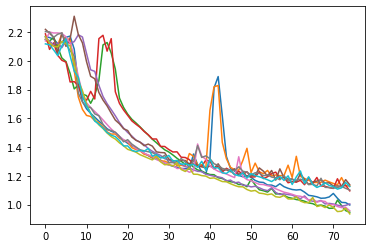

In [80]:
for i in range(k):
    plt.plot(model1.kfcv_histories[i][0])
    plt.plot(model1.kfcv_histories[i][1])

In [81]:
cv_probabilities, cv_predictions, cv_true, cv_comparisons, cv_df = [], [], [], [], []

In [82]:
for i in range(k):
    cv_probabilities.append(model1.kfcv_prob[i])
    cv_predictions.append(model1.kfcv_pred[i])
    cv_true.append(model1.kfcv_true[i])

In [83]:
for i in range(k):
    stack = np.vstack([cv_predictions[i], cv_true[i]]).T
    df = pd.DataFrame(stack)
    cv_comparisons.append(stack)
    cv_df.append(df)

### Accuracies

In [84]:
for df in cv_df:
    print(f'Accuracy: {sum(df[0] == df[1])/len(df)}')
    
print(f'Mean: {np.mean(df[0] == df[1])}')

Accuracy: 0.5966930265995687
Accuracy: 0.6164629762760604
Accuracy: 0.5936736161035227
Accuracy: 0.6094895758447161
Accuracy: 0.6085549964054637
Mean: 0.6085549964054637


In [85]:
mean_f1 = pd.DataFrame()

### F1-Scores

<AxesSubplot:>

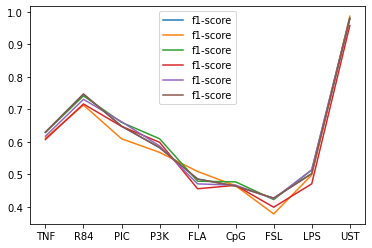

In [89]:
for df in cv_df:
    cr = sklearn.metrics.classification_report(df[0], df[1], target_names=ligands, output_dict=True)
    cr = pd.DataFrame(cr).transpose()
    cr = cr[:9]
    total_f1 = pd.concat([total_f1, cr], axis=1)
    
total_f1.plot(y='f1-score')

<AxesSubplot:>

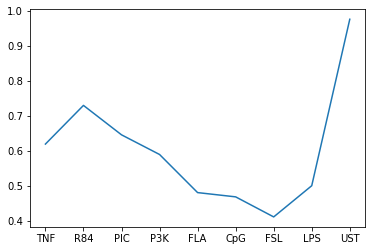

In [90]:
mean_f1 = np.mean(total_f1['f1-score'].transpose())
x.plot()

In [91]:
print(x)

TNF    0.619093
R84    0.729743
PIC    0.645574
P3K    0.589299
FLA    0.480244
CpG    0.468050
FSL    0.410654
LPS    0.499949
UST    0.976304
dtype: float64


### Confusion Fractions

In [103]:
fractions, cfs = [], []

In [104]:
for true, probabilities in zip(cv_true, cv_probabilities):
    fractions.append(Fraction(true, probabilities))

<AxesSubplot:>

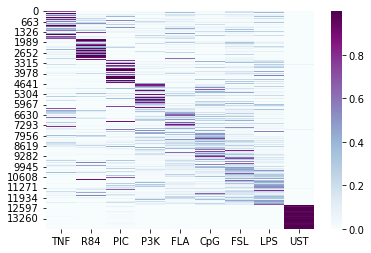

In [108]:
sns.heatmap(fractions[0], cmap='BuPu', xticklabels=ligands)

<AxesSubplot:>

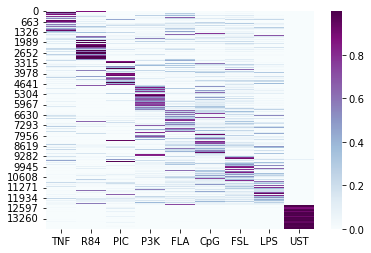

In [109]:
sns.heatmap(fractions[1], cmap='BuPu', xticklabels=ligands)

<AxesSubplot:>

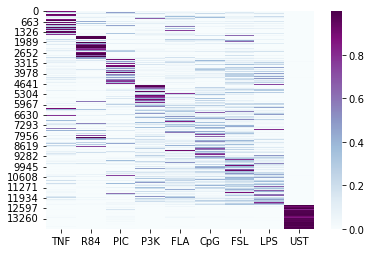

In [110]:
sns.heatmap(fractions[2], cmap='BuPu', xticklabels=ligands)

<AxesSubplot:>

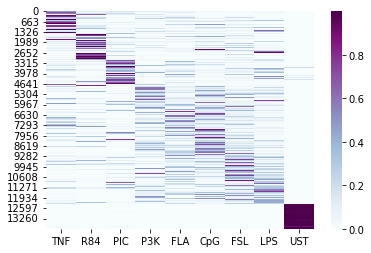

In [111]:
sns.heatmap(fractions[3], cmap='BuPu', xticklabels=ligands)

<AxesSubplot:>

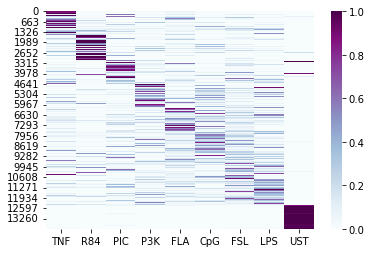

In [112]:
sns.heatmap(fractions[4], cmap='BuPu', xticklabels=ligands)

In [128]:
mean_fraction = np.mean(fractions, axis=0)

<AxesSubplot:>

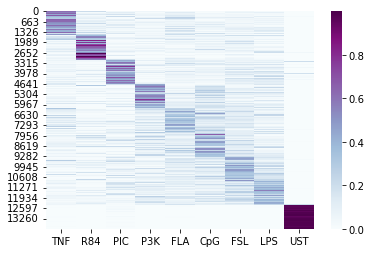

In [129]:
sns.heatmap(mean_fraction, cmap='BuPu', xticklabels=ligands)

## Polarization State Analysis

In [20]:
net = LSTM(input_size, hidden_sizes, output_size, num_layers=num_layers, device=device)
net.train()

LSTM(
  (lstm): LSTM(1, 98, batch_first=True)
  (fc1): Linear(in_features=98, out_features=9, bias=True)
)

In [21]:
model = LSTMTrainer(model=net, device=device)

In [22]:
polarization_data, polar_dataloaders = [], []

In [23]:
for i in polarization:
    polarization_data.append(DatasetPolar(ligands, [i], replicas, size))
    
for data in polarization_data:
    _, dset = torch.utils.data.random_split(data, [11592-3200, 3200])
    load = torch.utils.data.DataLoader(dset, shuffle=True, batch_size=32)
    polar_dataloaders.append(load)

In [24]:
kfcv_p = []

In [25]:
for i in range(1, k+1):
    model.load(load_dir + 'mmkfcv' + str(i) + '.pth')
    for data in polar_dataloaders:
        prob, pred, true = model.evaluate(data, batch_size=32, probability_size=9)
        kfcv_p.append([prob, pred, true])

* kfcv_p organized by unpolarized, ib, ig, i0, i3, i4 for all 5 models
* 6 x 5 = 30
* each list in kfcv_p should have a tuple (list) of probabilities, predictions, and labels

In [108]:
print(len(kfcv_p), len(kfcv_p[0]))

30 3


##### Grabbing averages across 5 models for simplicity

In [69]:
polarization_states = [[], [], [], [], [], []]

In [70]:
i = 0
for prob, pred, true in kfcv_p:
    if (i == 0 or i == 6 or i == 12 or i == 18 or i == 24):
        polarization_states[0].append([prob, pred, true])
        
    if (i == 1 or i == 7 or i == 13 or i == 19 or i == 25):
        polarization_states[1].append([prob, pred, true])
        
    if (i == 2 or i == 8 or i == 14 or i == 20 or i == 26):
        polarization_states[2].append([prob, pred, true])
        
    if (i == 3 or i == 9 or i == 15 or i == 21 or i == 27):
        polarization_states[3].append([prob, pred, true])
        
    if (i == 4 or i == 10 or i == 16 or i == 22 or i == 28):
        polarization_states[4].append([prob, pred, true])
        
    if (i == 5 or i == 11 or i == 17 or i == 23 or i == 29):
        polarization_states[5].append([prob, pred, true])
    i += 1

In [130]:
polarization_accuracies = []
polarization_f1 = []
polarization_fraction = []

In [131]:
fractions, dfs, f1s = [], [], []

In [132]:
for i in range(6):
    avgcf = pd.DataFrame()
    for prob, pred, true in polarization_states[i]:
        fraction = Fraction(true, prob)
        fractions.append(fraction)
        
        tab = np.vstack([pred, true]).T
        df = pd.DataFrame(tab)
        acc = sum(df[0] == df[1])/len(df)
        dfs.append(acc)
        
        cf = sklearn.metrics.classification_report(df[0], df[1], target_names=ligands, output_dict=True)
        cf = pd.DataFrame(cf).transpose()
        cf = cf[:9]
        avgcf = pd.concat([avgcf, cf], axis=1)
        
    polarization_fraction.append(np.mean(fractions, axis=0))
    polarization_accuracies.append(np.mean(dfs))
    polarization_f1.append(np.mean(avgcf['f1-score'].transpose()))

In [133]:
print(len(polarization_accuracies), len(polarization_f1), len(polarization_fraction))

6 6 6


##### Accuracies

In [134]:
newline = '\n'
print(f'Unpolarized: {polarization_accuracies[0]} {newline}ib: {polarization_accuracies[1]}{newline}ig: {polarization_accuracies[2]}{newline}i0: {polarization_accuracies[3]}{newline}i3: {polarization_accuracies[4]}{newline}i4: {polarization_accuracies[5]}')

Unpolarized: 0.6345 
ib: 0.629875
ig: 0.6108333333333333
i0: 0.61640625
i3: 0.6190625000000001
i4: 0.6253229166666667


##### F1-Score

In [135]:
print(f'Unpolarized:{newline}{polarization_f1[0]} {newline}ib:{newline}{polarization_f1[1]}{newline}ig:{newline}{polarization_f1[2]}{newline}i0:{newline}{polarization_f1[3]}{newline}i3:{newline}{polarization_f1[4]}{newline}i4:{newline}{polarization_f1[5]}')    

Unpolarized:
TNF    0.653083
R84    0.757840
PIC    0.798548
P3K    0.549265
FLA    0.521580
CpG    0.459023
FSL    0.395733
LPS    0.553690
UST    0.987669
dtype: float64 
ib:
TNF    0.562782
R84    0.777953
PIC    0.586903
P3K    0.662013
FLA    0.547297
CpG    0.507386
FSL    0.510052
LPS    0.509089
UST    0.982435
dtype: float64
ig:
TNF    0.706917
R84    0.720402
PIC    0.609705
P3K    0.524476
FLA    0.357130
CpG    0.375869
FSL    0.323889
LPS    0.511934
UST    0.985744
dtype: float64
i0:
TNF    0.671465
R84    0.768277
PIC    0.675368
P3K    0.571383
FLA    0.433501
CpG    0.553069
FSL    0.509289
LPS    0.480267
UST    0.987385
dtype: float64
i3:
TNF    0.645649
R84    0.756221
PIC    0.716493
P3K    0.545729
FLA    0.533263
CpG    0.503790
FSL    0.439445
LPS    0.544997
UST    0.968906
dtype: float64
i4:
TNF    0.635703
R84    0.694461
PIC    0.628339
P3K    0.780396
FLA    0.562550
CpG    0.572547
FSL    0.465828
LPS    0.578728
UST    0.961927
dtype: float64


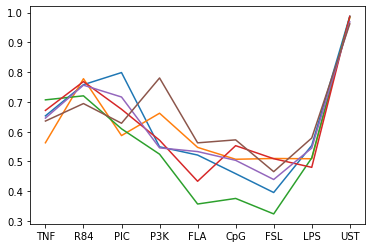

In [146]:
for f1 in polarization_f1:
    f1.plot()
    
# blue = unpolarized, orange = ib, green = ig, red = i0, purple = i3, brown = i4

##### Confusion Fractions

Unpolarized


<AxesSubplot:>

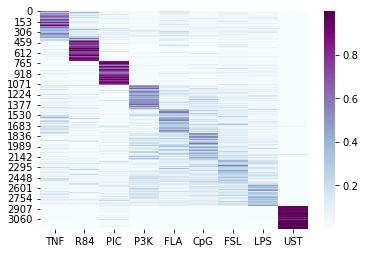

In [140]:
print('Unpolarized')
sns.heatmap(polarization_fraction[0], xticklabels=ligands, cmap='BuPu')

ib


<AxesSubplot:>

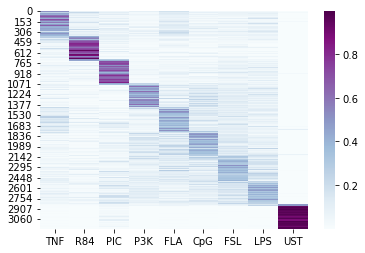

In [141]:
print('ib')
sns.heatmap(polarization_fraction[1], xticklabels=ligands, cmap='BuPu')

ig


<AxesSubplot:>

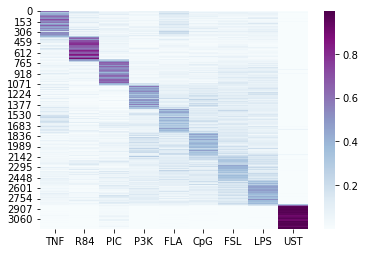

In [142]:
print('ig')
sns.heatmap(polarization_fraction[2], xticklabels=ligands, cmap='BuPu')

i0


<AxesSubplot:>

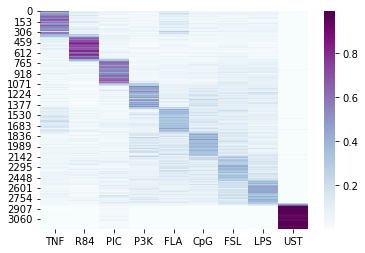

In [143]:
print('i0')
sns.heatmap(polarization_fraction[3], xticklabels=ligands, cmap='BuPu')

i3


<AxesSubplot:>

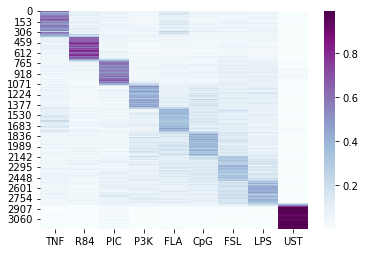

In [144]:
print('i3')
sns.heatmap(polarization_fraction[4], xticklabels=ligands, cmap='BuPu')

i4


<AxesSubplot:>

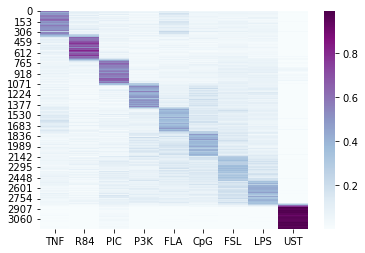

In [145]:
print('i4')
sns.heatmap(polarization_fraction[5], xticklabels=ligands, cmap='BuPu')